In [1]:
# % load_ext autoreload
# % autoreload 2
import sys

sys.path.append("../")
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from src.dataloaders import PointOnlyDataloader, NoiseDataLoader, IDataloader
from src.solutions import EllipseDataFitting

dataset_dir = Path('../dataset')


In [3]:
df = pd.read_csv(dataset_dir / 'dataset_100000_with_noise_2e5.csv')

In [7]:
signal_df = df[df.signal]

In [18]:
df = df[df.entry == 0]

In [19]:
df

,entry,subentry,x_c,y_c,z_c,t_c,signal
0,0,0,100,55,201.05,2.956575,True
1,0,1,105,31,201.05,3.164390,True
2,0,2,110,32,201.05,3.150230,True
3,0,3,106,67,201.05,2.841400,True
4,0,4,117,37,201.05,3.094911,True
...,...,...,...,...,...,...,...
794,0,794,131,202,201.05,6.078539,False
795,0,795,168,101,201.05,5.509062,False
796,0,796,83,96,201.05,4.902512,False
797,0,797,24,153,201.05,2.674867,False


In [38]:
points = [
    [43,227,3.67793],
[124,213,3.64717],
[183,232,3.74357],
[181,34,2.91527],
[32,201,3.59418],
[214,35,2.93361],
[64,69,3.02133],
[142,56,3.0123],
[144,54,2.96898],
    ]











In [33]:
df = pd.read_csv(dataset_dir / "dataset_0_result.csv")

In [34]:
df

,INDEX:196:<uint>,subentry:196:<uint>,x_c:196:<uint>,y_c:196:<uint>,z_c:196:<double>,t_c:196:<double>,signal:196:<uint>
0,0,0,100,55,201.05,2.164233,1
1,0,3,106,67,201.05,2.049059,1
2,0,6,119,51,201.05,2.178033,1
3,0,7,120,71,201.05,2.000937,1
4,0,8,114,74,201.05,1.986993,1
...,...,...,...,...,...,...,...
191,0,788,63,169,201.05,2.922077,0
192,0,791,109,121,201.05,3.591860,0
193,0,792,107,178,201.05,4.341483,0
194,0,795,101,152,201.05,5.444699,0


In [39]:
p = pd.DataFrame(points, columns=['x_c', 'y_c', 't_c'])
p.x_c = p.x_c.astype(int)
p.y_c = p.y_c.astype(int)

In [36]:
p

,x_c,y_c,t_c
0,43,227,3.67793
1,124,213,3.64717
2,183,232,3.74357
3,181,34,2.91527
4,32,201,3.59418
5,214,35,2.93361
6,64,69,3.02133
7,142,56,3.01230
8,144,54,2.96898


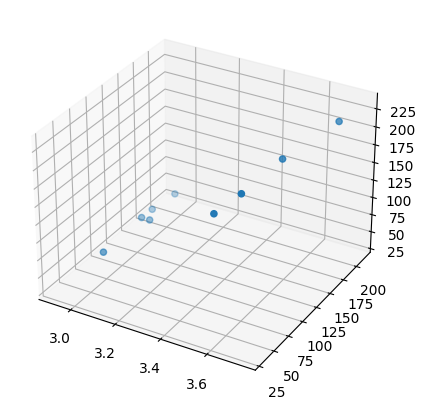

In [45]:
plt.figure(figsize=(8, 5), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(p['t_c'],p['x_c'], p['y_c'],  'r.', label='Signal')

<Axes3D: title={'center': 'data example'}, xlabel='t', ylabel='x', zlabel='y'>

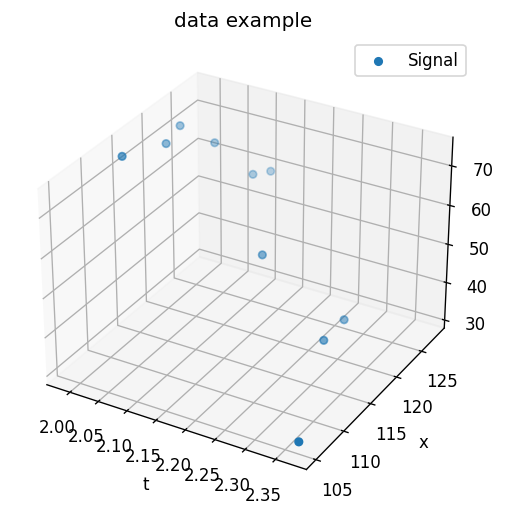

In [27]:
PointOnlyDataloader.plot_solution(p)

In [15]:
signal_df.groupby(by="entry").agg({'x_c': lambda x: x.max() - x.min(),
                                   'y_c': lambda x: x.max() - x.min()
                                   }).agg({
    'x_c': 'mean',
    'y_c': 'mean'
})

x_c    114.272168
y_c    114.144709
dtype: float64

In [11]:
signal_df.groupby(by="entry").min('x_c')

,subentry,x_c,y_c,z_c,t_c,signal
entry,,,,,,
0,0,100,31,201.05,2.773486,True
1,0,43,98,201.05,2.270501,True
2,0,68,85,201.05,1.605330,True
3,0,53,73,201.05,3.450431,True
4,0,28,54,201.05,5.254445,True
...,...,...,...,...,...,...
99995,0,34,9,201.05,4.532791,True
99996,0,93,21,201.05,2.050748,True
99997,0,42,21,201.05,4.081661,True
